<a href="https://colab.research.google.com/github/2303A51770Supreeth/ADM_PROJECT/blob/main/ADM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

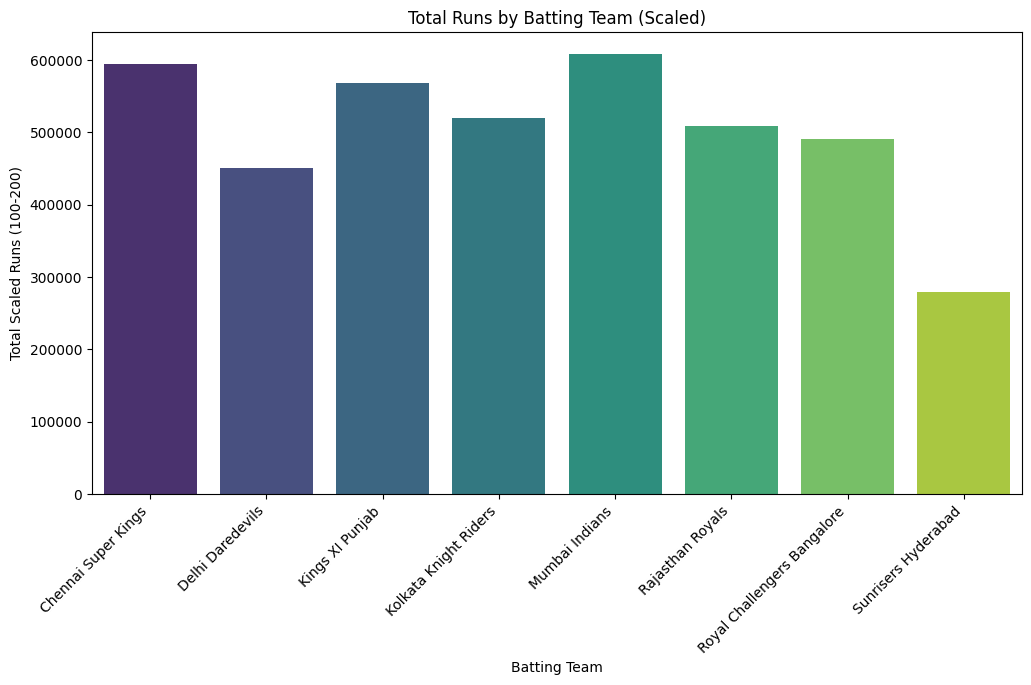

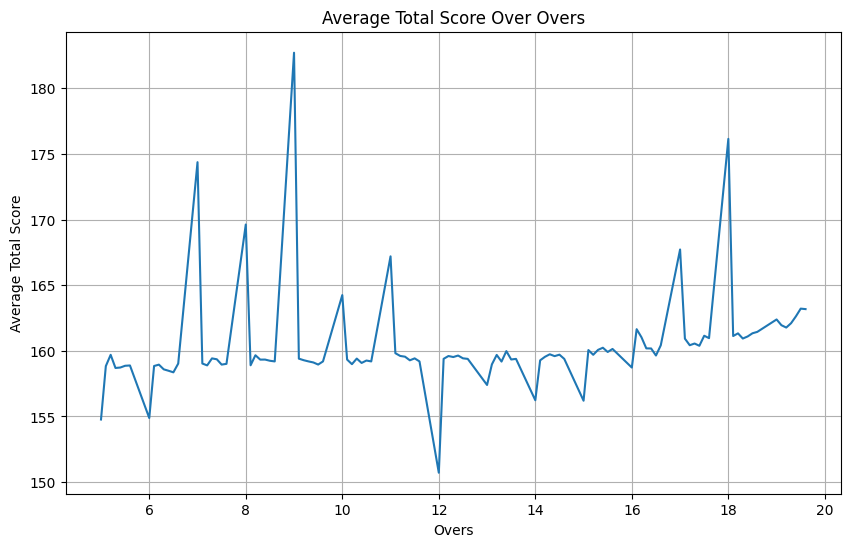

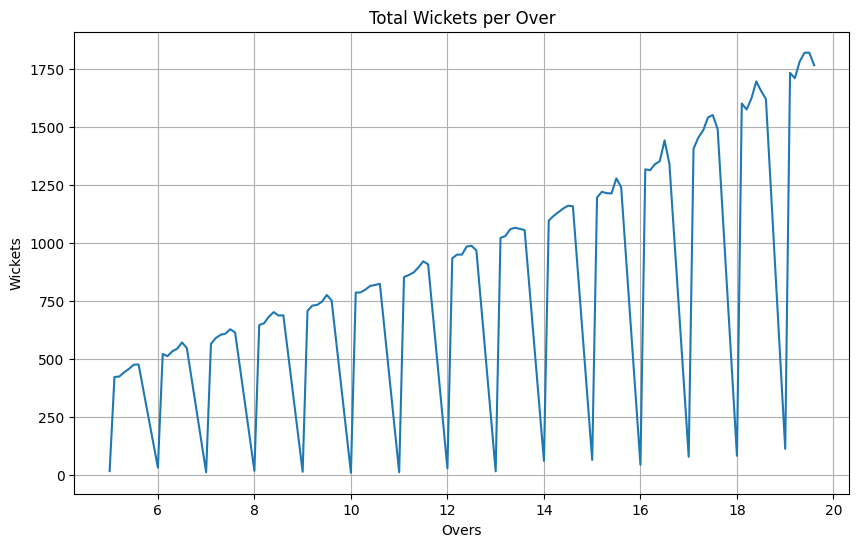

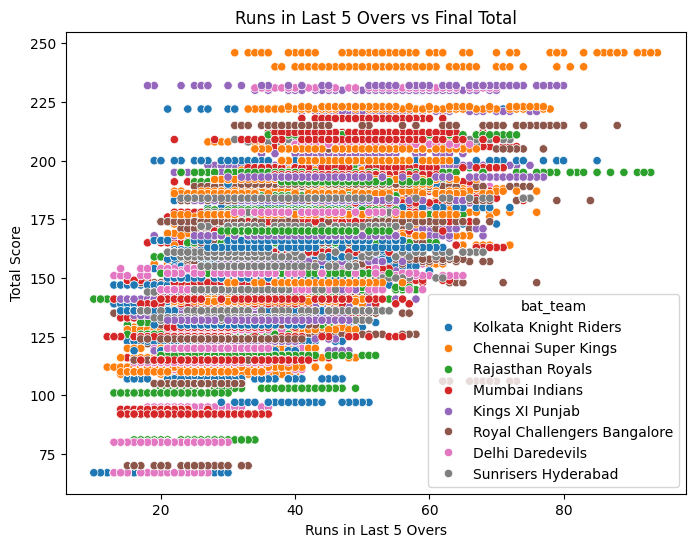

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

if not os.path.exists('ipl_data.csv'):
    raise FileNotFoundError('The file "ipl_data.csv" was not found in the current directory.')

df = pd.read_csv('ipl_data.csv', on_bad_lines='skip')

expected_columns = {'mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker', 'bat_team', 'bowl_team', 'overs', 'runs', 'total', 'date', 'wickets', 'runs_last_5', 'wickets_last_5'}
if not expected_columns.issubset(set(df.columns)):
    missing = expected_columns - set(df.columns)
    raise ValueError(f'The dataset is missing the following required columns: {missing}')

df.drop(labels=['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1, inplace=True)

consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
df = df[df['overs'] >= 5.0]

scaler = MinMaxScaler(feature_range=(100, 200))
df['scaled_runs'] = scaler.fit_transform(df[['runs']])

total_scaled_runs = df.groupby('bat_team')['scaled_runs'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=total_scaled_runs, x='bat_team', y='scaled_runs', ci=None, palette='viridis')
plt.title('Total Runs by Batting Team (Scaled)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Batting Team')
plt.ylabel('Total Scaled Runs (100-200)')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='overs', y='total', estimator='mean', ci=None)
plt.title('Average Total Score Over Overs')
plt.xlabel('Overs')
plt.ylabel('Average Total Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='overs', y='wickets', estimator='sum', ci=None)
plt.title('Total Wickets per Over')
plt.xlabel('Overs')
plt.ylabel('Wickets')
plt.grid(True)
plt.show()

df['date'] = pd.to_datetime(df['date'])

encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='runs_last_5', y='total', hue='bat_team')
plt.title('Runs in Last 5 Overs vs Final Total')
plt.xlabel('Runs in Last 5 Overs')
plt.ylabel('Total Score')
plt.show()

encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
                         'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
                         'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
                         'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
                         'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
                         'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
                         'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
